In [4]:
import numpy as np
import seaborn as sns

# Generate a sample of 100 numbers from a standard normal distribution
sample1 = np.random.normal(loc=0, scale=1, size=100)
sample2 = np.random.normal(loc=0, scale=1, size=100)
sample3 = np.random.normal(loc=0, scale=1, size=100)
sample4 = np.random.normal(loc=0, scale=1, size=100)
sample5 = np.random.normal(loc=0, scale=1, size=100)

<Axes: ylabel='Density'>

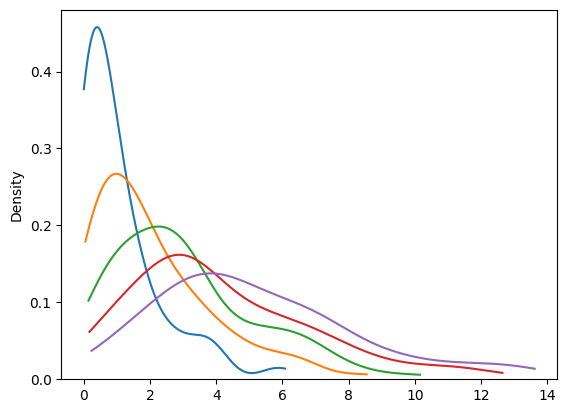

In [5]:
x = sample1**2
y = sample1**2 + sample2**2
z = sample1**2 + sample2**2 + sample3**2
u = sample1**2 + sample2**2 + sample3**2 + sample4**2
v = sample1**2 + sample2**2 + sample3**2 + sample4**2 + sample5**2

sns.kdeplot(x, clip=(x.min(),x.max()))
sns.kdeplot(y, clip=(y.min(),y.max()))
sns.kdeplot(z, clip=(z.min(),z.max()))
sns.kdeplot(u, clip=(u.min(),u.max()))
sns.kdeplot(v, clip=(v.min(),v.max()))

In [2]:
#Goodness of fit test

In [7]:
#Ex 1-
# Suppose we have a six-sided fair die, and we want to test if the die is indeed fair.
# We roll the die 60 times and record the number of times each side comes up.
# We'll use the Chi-Square Goodness-of-Fit test to determine if the observed frequencies
# are consistent with a fair die (i.e., a uniform distribution of the sides).

# Observed frequencies:
# • Side 1: 12 times
# • Side 2: 8 times
# • Side 3: 11 times
#   Side 4: 9 times
# • Side 5: 10 times
#   side 6: 10 times

In [8]:
import scipy.stats as stats

test_statistic = 1  # Chi-Square test statistic from the previous example
degrees_of_freedom = 5  # Degrees of freedom from the previous example

# Calculate the p-value using the chi2 survival function (sf)
p_value = stats.chi2.sf(test_statistic, degrees_of_freedom)

print("P-value:", p_value)

P-value: 0.9625657732472964


In [9]:
# Ex 2-
# Suppose a marketing team at a retail company wants to understand the distribution of
# visits to their website by day of the week. They have a hypothesis that visits are uniformly
# distributed across all days of the week, meaning they expect an equal number of visits on each day.
# They collected data on website visits for four weeks and want to test if the observed distribution
# matches the expected uniform distribution.
# Observed frequencies (number of website visits per day of the week for four weeks):
# • Monday: 420
# • Tuesday: 380
# • Wednesday: 410
# • Thursday: 400
# • Friday: 410
# • Saturday: 430
# • Sunday: 390

In [10]:
import scipy.stats as stats

test_statistic = 11  # Chi-Square test statistic from the previous example
degrees_of_freedom = 6  # Degrees of freedom from the previous example

# Calculate the p-value using the chi2 survival function (sf)
p_value = stats.chi2.sf(test_statistic, degrees_of_freedom)

print("P-value:", p_value)

P-value: 0.08837643235678545


In [11]:
# A survey of 800 families in a village with 4 children each revealed the following distribution:
# #boys
# 0
# 2
# 3
# 4
# #families
# 32
# 178
# 290
# 236
# 64
# Is this data consistent with the result that male and female births are equally probable?

In [12]:
import scipy.stats as stats

test_statistic = 18.93  # Chi-Square test statistic from the previous example
degrees_of_freedom = 4  # Degrees of freedom from the previous example

# Calculate the p-value using the chi2 survival function (sf)
p_value = stats.chi2.sf(test_statistic, degrees_of_freedom)

print("P-value:", p_value)

P-value: 0.0008112261867904042


In [13]:
import pandas as pd
import numpy as np
from scipy.stats import chisquare

# Load the Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
# Count passengers in each class
class_counts = data['Pclass'].value_counts().sort_index()
class_counts



Pclass
1    216
2    184
3    491
Name: count, dtype: int64

In [15]:
# Calculate the expected counts assuming a uniform distribution
total_passengers = len(data)
expected_counts = total_passengers / 3
expected = [expected_counts] * 3
print("Expected Passenger Counts (assuming uniform distribution):\n", expected)



Expected Passenger Counts (assuming uniform distribution):
 [297.0, 297.0, 297.0]


In [16]:
# Perform the Chi-Square Goodness of Fit test
chi2, p_value = chisquare(class_counts, expected)

# Print the results
print("\nChi-Square Statistic: {:.2f}".format(chi2))
print("P-value: {:.4f}".format(p_value))




Chi-Square Statistic: 191.80
P-value: 0.0000


In [17]:
# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nWe reject the null hypothesis. The distribution of passengers among the classes is not uniform.")
else:
    print("\nWe fail to reject the null hypothesis. The distribution of passengers among the classes is uniform.")



We reject the null hypothesis. The distribution of passengers among the classes is not uniform.


In [21]:
#test for indpendence

In [22]:
# A researcher wants to investigate if there is an association between the level of
# education (categorical variable) and the preference for a particular type of exercise (categorical variable)
# among a group of 150 individuals. The researcher collects data and creates the following contingency table
# Education
# Exercise Type
# Yoga
# Running Swimming Total
# High School
# 15
# Bachelor's
# 20
# Master's or phD 5
# 20
# 30
# 15
# 10
# 15
# 20
# 45
# 65
# 40
# Total
# 40
# 65
# 45
# 150

In [23]:
 import scipy.stats as stats

test_statistic = 9.95  # Chi-Square test statistic from the previous example
degrees_of_freedom = 4  # Degrees of freedom from the previous example

# Calculate the p-value using the chi2 survival function (sf)
p_value = stats.chi2.sf(test_statistic, degrees_of_freedom)

print("P-value:", p_value)

P-value: 0.04127840066324082


In [24]:
# We will use the Chi-Square test for independence to see if the survival rate of passengers is independent of the passenger class.
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Load the Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
contingency_table = pd.crosstab(data['Survived'], data['Pclass'])
contingency_table

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [26]:
# Perform the Chi-Square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("\nChi-Square Statistic: {:.2f}".format(chi2))
print("P-value: {:.4f}".format(p_value))
print("Degrees of Freedom: {}".format(dof))
print("Expected Frequencies: \n{}".format(expected))




Chi-Square Statistic: 102.89
P-value: 0.0000
Degrees of Freedom: 2
Expected Frequencies: 
[[133.09090909 113.37373737 302.53535354]
 [ 82.90909091  70.62626263 188.46464646]]


In [27]:
# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nWe reject the null hypothesis. There is a significant association between passenger class and survival rate.")
else:
    print("\nWe fail to reject the null hypothesis. There is no significant association between passenger class and survival rate.")


We reject the null hypothesis. There is a significant association between passenger class and survival rate.
